In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


### Loading Data Set

In [33]:

file_path = r"D:\Sajid\Chrun_Prediction\data\Raw\WA_Fn-UseC_-Telco-Customer-Churn.csv"

df = pd.read_csv(file_path)

print(f' Data has {df.shape[0]} Rows and {df.shape[1]} cols:\n')
df.head()

 Data has 7043 Rows and 21 cols:



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Basic Overview
- Check column types and look for any missing values.

In [34]:
print("\nColumn Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())


Column Types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilli

#### Some values in TotalCharges are blank strings. We replace them with NaN and drop those rows

In [35]:
# Clean TotalCharges and change its data type to numeric


# Check how many values are empty strings
df['TotalCharges'].replace(" ", np.nan, inplace=True)
print("\nMissing TotalCharges:", df['TotalCharges'].isnull().sum())

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

# Drop rows where TotalCharges is NaN
df = df.dropna(subset=['TotalCharges'])
df = df.reset_index(drop=True)


Missing TotalCharges: 11


### Drop Irrelevant Columns
- The `customerID` column is a unique identifier and doesn't carry predictive power so we can drop it from data

In [36]:
df.drop("customerID", axis=1, inplace=True)

### Basic Exploratory Data Analysis (EDA)
- Visualize class distribution and summary statistics.

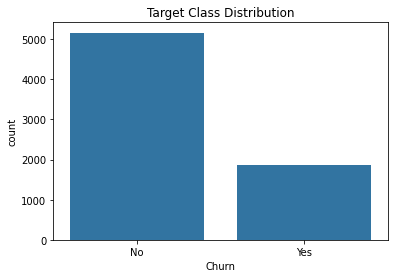

Distribution of target variable:
 No     0.734215
Yes    0.265785
Name: Churn, dtype: float64


In [37]:
# Churn distribution
sns.countplot(x='Churn', data=df)
plt.title("Target Class Distribution")
plt.show()


# check distribution of target metric
print('Distribution of target variable:\n', df['Churn'].value_counts(normalize=True))

Text(0.5, 1.0, 'Tenure vs Churn')

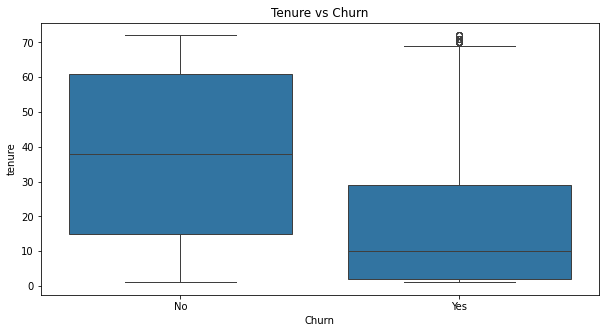

In [38]:
plt.figure(figsize = (10,5))

sns.boxplot(x = df["Churn"], y = df["tenure"])

plt.title("Tenure vs Churn")

Text(0.5, 1.0, 'Churn by Contract Type')

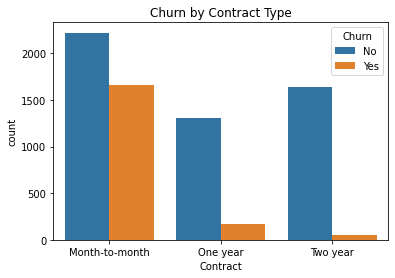

In [39]:
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Churn by Contract Type")

In [40]:
# Summary statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000


In [41]:
## checking distinct values for categorical features

categorical_cols = df.select_dtypes(include = ["object"]).columns

for col in categorical_cols:
    print(f"{col}:{df[col].nunique()} unique_values" )

gender:2 unique_values
Partner:2 unique_values
Dependents:2 unique_values
PhoneService:2 unique_values
MultipleLines:3 unique_values
InternetService:3 unique_values
OnlineSecurity:3 unique_values
OnlineBackup:3 unique_values
DeviceProtection:3 unique_values
TechSupport:3 unique_values
StreamingTV:3 unique_values
StreamingMovies:3 unique_values
Contract:3 unique_values
PaperlessBilling:2 unique_values
PaymentMethod:4 unique_values
Churn:2 unique_values


### Save Cleaned Dataset
- Export the cleaned version for reuse in feature engineering and modeling.

In [42]:
# Save this intermediate cleaned version for reuse
df.to_csv("D:/Sajid/Chrun_Prediction/data/processed/clean_data.csv", index=False)
print("Cleaned data saved as 'clean_data.csv'")


Cleaned data saved as 'clean_data.csv'
